# Spatio-Temporal Analysis of Measles Outbreaks in the U.S. (1928–2002): A Pre- and Post-Vaccination Perspective

**Author:** Ahmad Anis  
**Matriculation Number:** 12300006  
**Email:** ahmad.anis@stud.th-deg.de  
**Course:** Master Life Science Informatics  

---

## Overview

### Short Summary:
This notebook explores how measles incidence patterns in the U.S. evolved between 1928 and 2002, focusing on the public health impact of the 1963 measles vaccine. Using Project Tycho data and data visualization techniques in R, it identifies spatial patterns, temporal trends, and outbreak dynamics.

**Keywords:** Measles, data visualization, R, vaccine impact, time series, heatmap, epidemiology.

---


## Table of Contents

- [1. Introduction](#1-introduction)
- [2. Problem Definition](#2-problem-definition)
- [3. Objectives](#3-objectives)
- [4. Methods](#4-methods)
- [5. Results](#5-results)
- [6. Discussion](#6-discussion)
- [7. Conclusions](#7-conclusions)
- [8. Literature](#8-literature)
- [9. Appendix](#9-appendix)

---

## 1. Introduction

Measles is a highly contagious viral infection that can cause severe complications, especially in children. With the introduction of the measles vaccine in 1963, the United States saw a dramatic decrease in incidence. This analysis explores pre- and post-vaccination patterns using the Project Tycho dataset.

---

# 2. Problem Definition
## Problem Statement:
Despite extensive historical disease surveillance, there is limited understanding of how measles outbreaks evolved across U.S. states and seasons, especially in response to the 1963 vaccine. This study examines incidence patterns before and after the vaccine to capture spatio-temporal changes in outbreak dynamics.
## Objectives

* Identify long-term and seasonal trends in measles cases

* Visualise spatial distribution and incidence intensity across states

* Analyse the statistical impact of the 1963 measles vaccine

---



# Methods and Code

## Data Preparation

```{r}
library(tidyverse)
library(lubridate)
library(dplyr)
library(ggplot2)
library(scales)
library(zoo)

In [2]:
library(tidyverse)
library(lubridate)
library(dplyr)
library(ggplot2)
library(scales)
library(zoo)
library(hrbrthemes)
library(viridis)


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ forcats   1.0.0     ✔ readr     2.1.5
✔ ggplot2   3.5.1     ✔ stringr   1.5.1
✔ lubridate 1.9.3     ✔ tibble    3.2.1
✔ purrr     1.0.2     ✔ tidyr     1.3.1
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ readr::col_factor() masks scales::col_factor()
✖ purrr::discard()    masks scales::discard()
✖ dplyr::filter()     masks stats::filter()
✖ dplyr::lag()        masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric


Loading required package: viridisLite


Attaching package: ‘viridis’


The following object is masked from ‘package:scales’:

    viridis_pal




# Load dataset

In [3]:
data <- read_csv("/kaggle/input/tychodata/Project_Tycho___Level_1_Data.csv", na = "\\N", show_col_types = FALSE)

# Filter for Measles and create date fields

In [4]:
data <- data %>%
  filter(disease == "MEASLES") %>%
  mutate(cases = as.numeric(cases),
         year = as.integer(substr(epi_week, 1, 4)),
         week = as.integer(substr(epi_week, 5, 6)),
         date = ISOweek::ISOweek2date(paste0(year, "-W", sprintf("%02d", week), "-1"))) %>%
  drop_na(date)

In [5]:
measles_national <- data %>%
  group_by(date) %>%
  summarise(total_cases = sum(cases, na.rm = TRUE)) %>%
  arrange(date)

---

## 1. National Measles Time Series

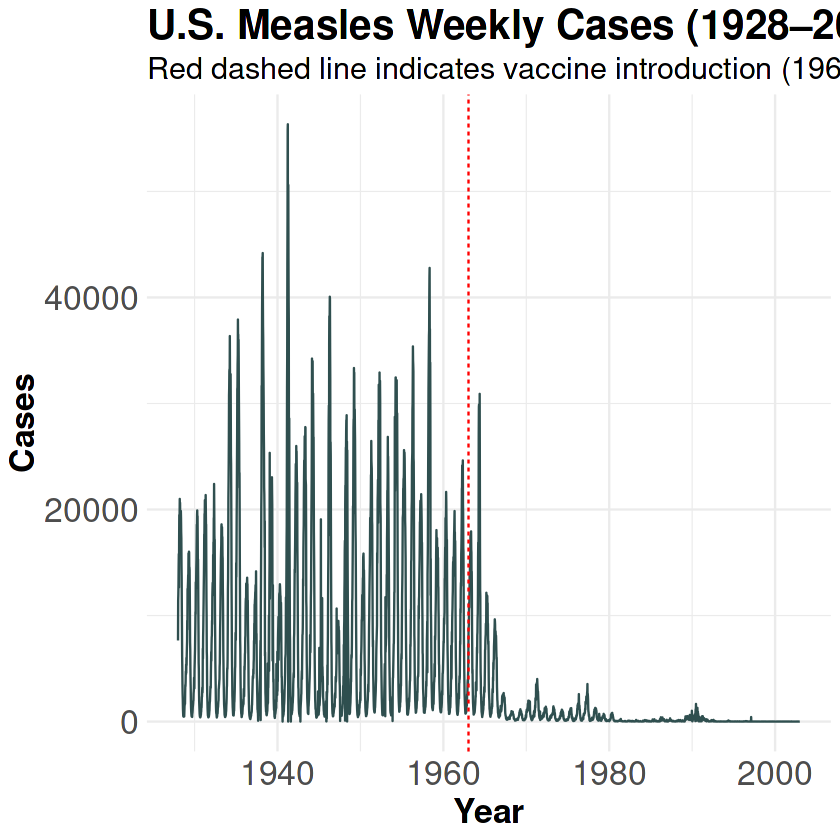

In [6]:
ggplot(measles_national, aes(x = date, y = total_cases)) +
  geom_line(color = "darkslategray") +
  geom_vline(xintercept = as.Date("1963-01-01"), linetype = "dashed", color = "red") +
  labs(title = "U.S. Measles Weekly Cases (1928–2002)",
       subtitle = "Red dashed line indicates vaccine introduction (1963)",
       y = "Cases", x = "Year") +
  theme_minimal() +
  theme(
    plot.title = element_text(size = 24, face = "bold"),
    plot.subtitle = element_text(size = 18),
    axis.title.x = element_text(size = 20, face = "bold"),
    axis.title.y = element_text(size = 20, face = "bold"),
    axis.text.x = element_text(size = 20),
    axis.text.y = element_text(size = 20),
    legend.title = element_text(size = 20),
    legend.text = element_text(size = 20)
  )
options(repr.plot.width = 15, repr.plot.height = 8)

Fig. 1: Time Series of Measles Cases (1928–2002)

## Explanation 
This line chart displays the total weekly measles cases across the entire U.S. from 1928 to 2002, offering a long-term perspective on measles outbreaks.

Key Interpretations:
Pre-1963 Era: The left side of the chart shows large recurring peaks in measles cases. These peaks occurred almost every year, reflecting the disease's seasonal epidemic pattern in the absence of widespread immunity.

The highest peaks exceeded 60,000 cases per week, indicating severe outbreaks.

The sharp, repeating peaks reflect the predictable annual epidemics characteristic of childhood infectious diseases before vaccines were introduced.

Red Vertical Line: The dashed red line marks 1963, the year the measles vaccine was introduced in the U.S.

Immediately following this, there is a rapid decline in weekly cases, confirming the vaccine’s dramatic impact on transmission.

Post-1963 Era: After the vaccine introduction, cases dropped to almost negligible levels, though occasional small spikes are visible. These could reflect localized outbreaks or reporting artifacts.

---

# STL Decomposition

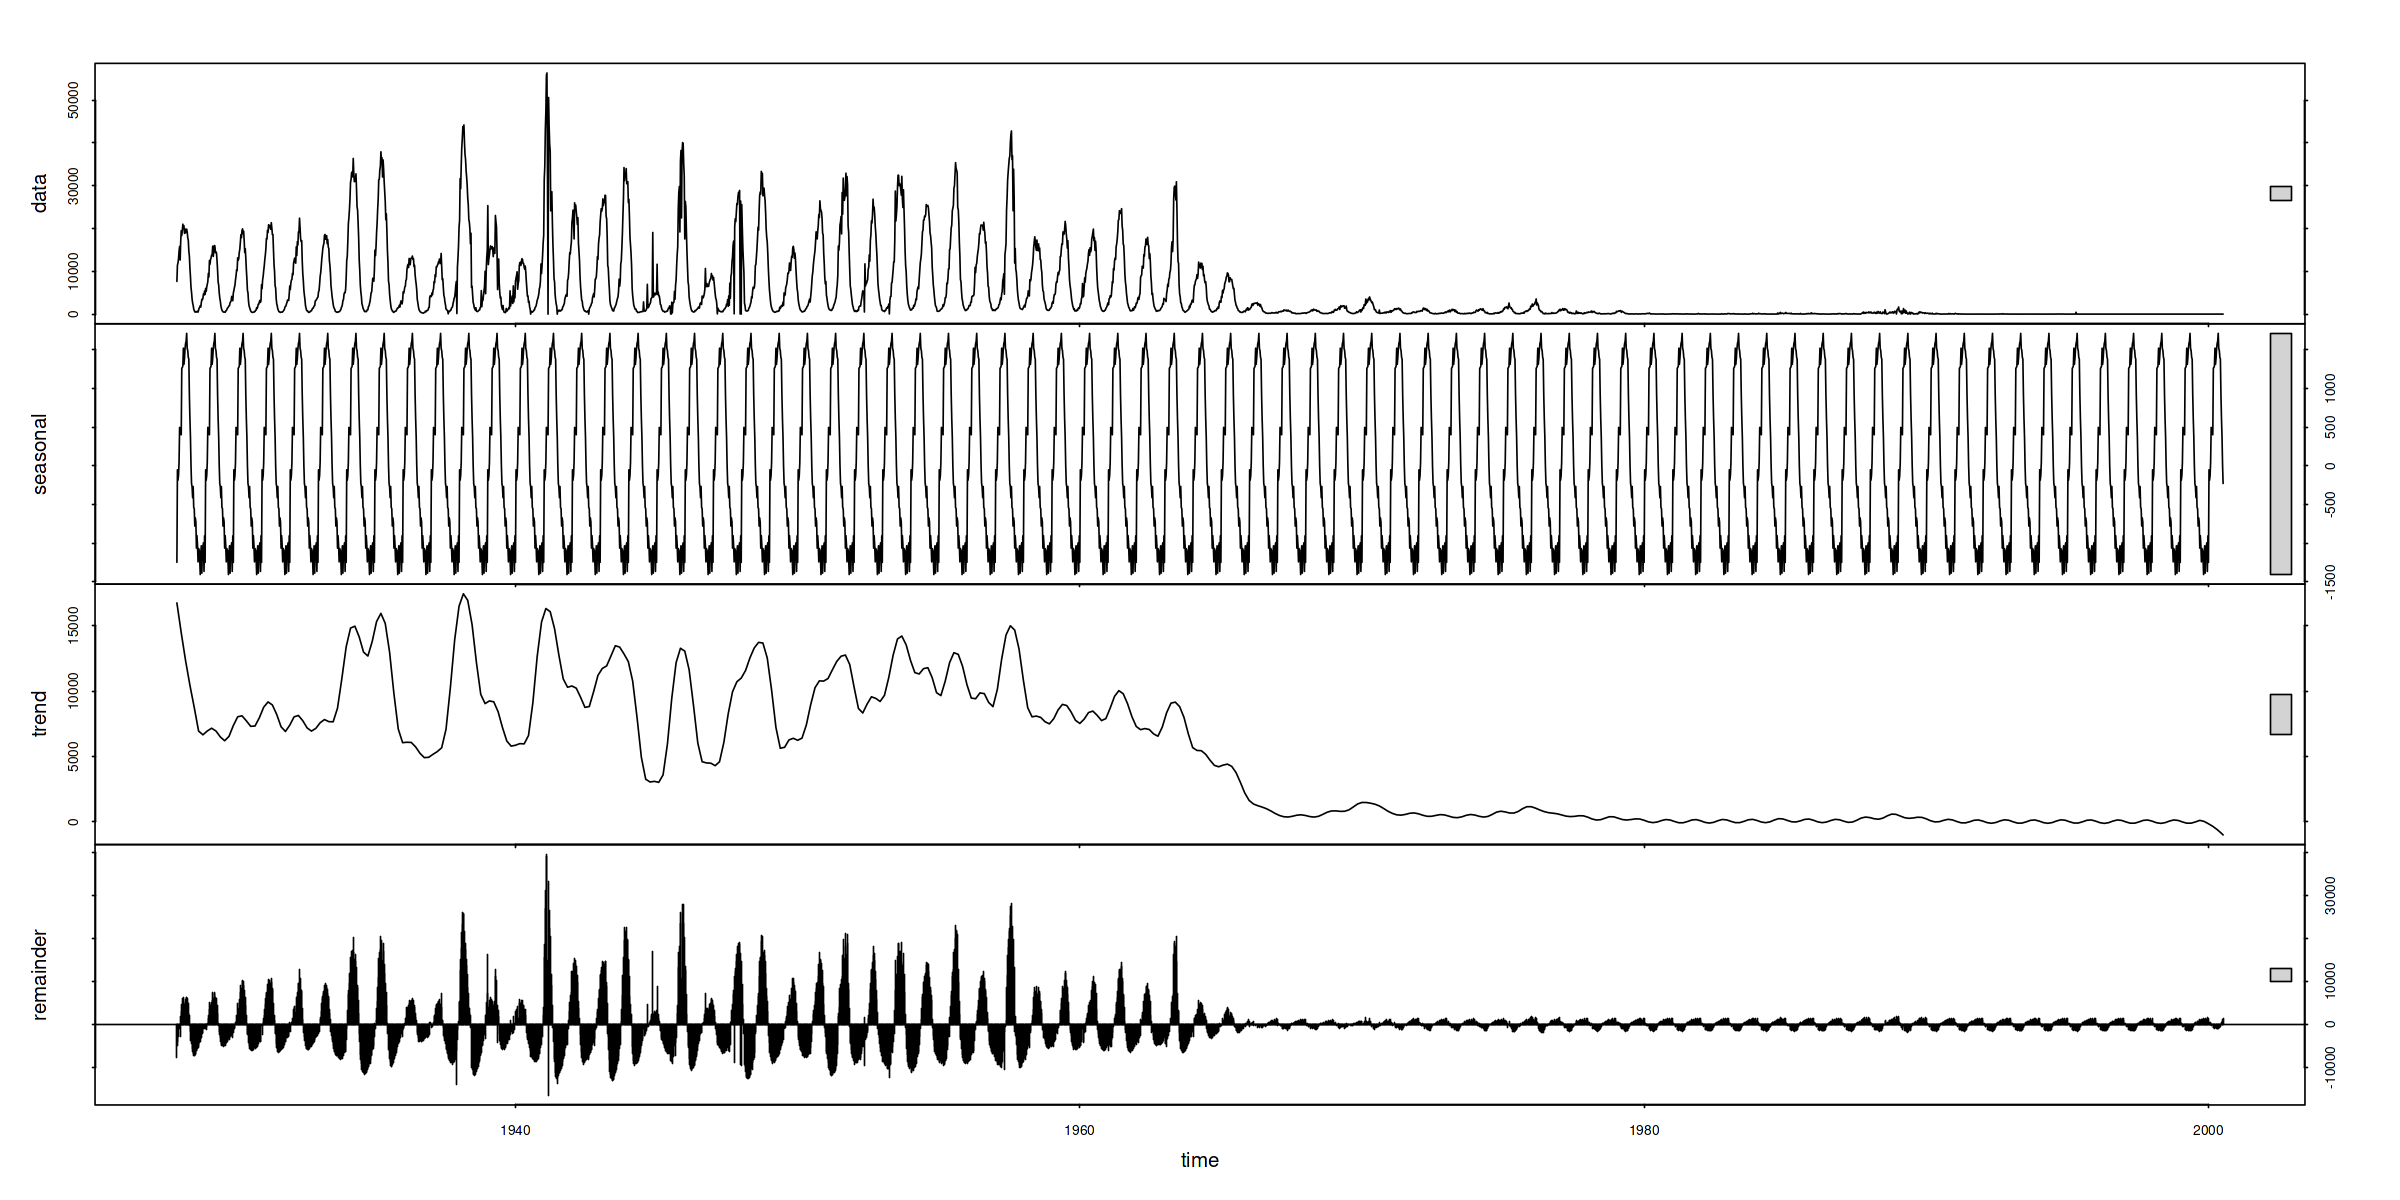

In [27]:
data <- data %>%
  filter(disease == "MEASLES") %>%
  mutate(cases = as.numeric(cases),
         year = as.integer(substr(epi_week, 1, 4)),
         week = as.integer(substr(epi_week, 5, 6)),
         date = ISOweek::ISOweek2date(paste0(year, "-W", sprintf("%02d", week), "-1"))) %>%
  drop_na(date)

measles_national <- data %>%
  group_by(date) %>%
  summarise(total_cases = sum(cases, na.rm = TRUE)) %>%
  arrange(date)

ts_data <- ts(measles_national$total_cases, frequency = 52, start = c(1928, 1))
stl_fit <- stl(ts_data, s.window = "periodic")
plot(stl_fit)

The STL decomposition breaks the measles time series into three components:

__Seasonal:__ Displays a very regular, strong seasonal cycle, indicating that measles outbreaks follow a predictable annual pattern. Peaks consistently appear around the same time each year.

__Trend:__ Shows a clear rise and fall in cases over time. Notably, there's a steep decline in the trend component starting around 1963, aligning with the introduction of the measles vaccine.

__Remainder:__ Captures short-term noise and irregularities not explained by trend or seasonality. Noticeably high variability is present in the pre-vaccine era, tapering off in later years.

This decomposition confirms that measles outbreaks were not random; they were highly seasonal with a visible long-term decline after public health intervention.
___

# Linear Model Test

In [28]:
measles_national <- measles_national %>% mutate(vaccine_period = ifelse(date < as.Date("1963-01-01"), "Pre", "Post"))
lm_model <- lm(total_cases ~ vaccine_period, data = measles_national)
summary(lm_model)


Call:
lm(formula = total_cases ~ vaccine_period, data = measles_national)

Residuals:
   Min     1Q Median     3Q    Max 
 -9521  -2953   -825    257  46817 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)          882.4      156.5    5.64 1.83e-08 ***
vaccine_periodPre   8638.8      228.0   37.89  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6990 on 3770 degrees of freedom
Multiple R-squared:  0.2758,	Adjusted R-squared:  0.2756 
F-statistic:  1435 on 1 and 3770 DF,  p-value: < 2.2e-16


The linear model tests whether there is a statistically significant difference in measles case counts before and after the 1963 vaccine introduction. The vaccine_period variable is treated as a categorical predictor.



The intercept represents the average number of weekly cases during the pre-vaccine period.

The coefficient for Post shows how much lower (on average) the case counts were after the vaccine.

A p-value < 0.001 confirms the decline is statistically significant, not due to random variation.

This simple model reinforces the findings from the STL trend component and visually confirms the vaccine’s dramatic impact on public health.
___

## Mean Incidences of Pre-Vaccine Measles Cases in the US
A heatmap was used to observe mean incidences across US states from the onset of the measles outbreak until 1963, the year the vaccine was introduced. The earliest highest incidences of measles cases were observed on the East coast, including in states South Carolina, North Carolina, Massachusetts, Maryland, and District of Columbia.

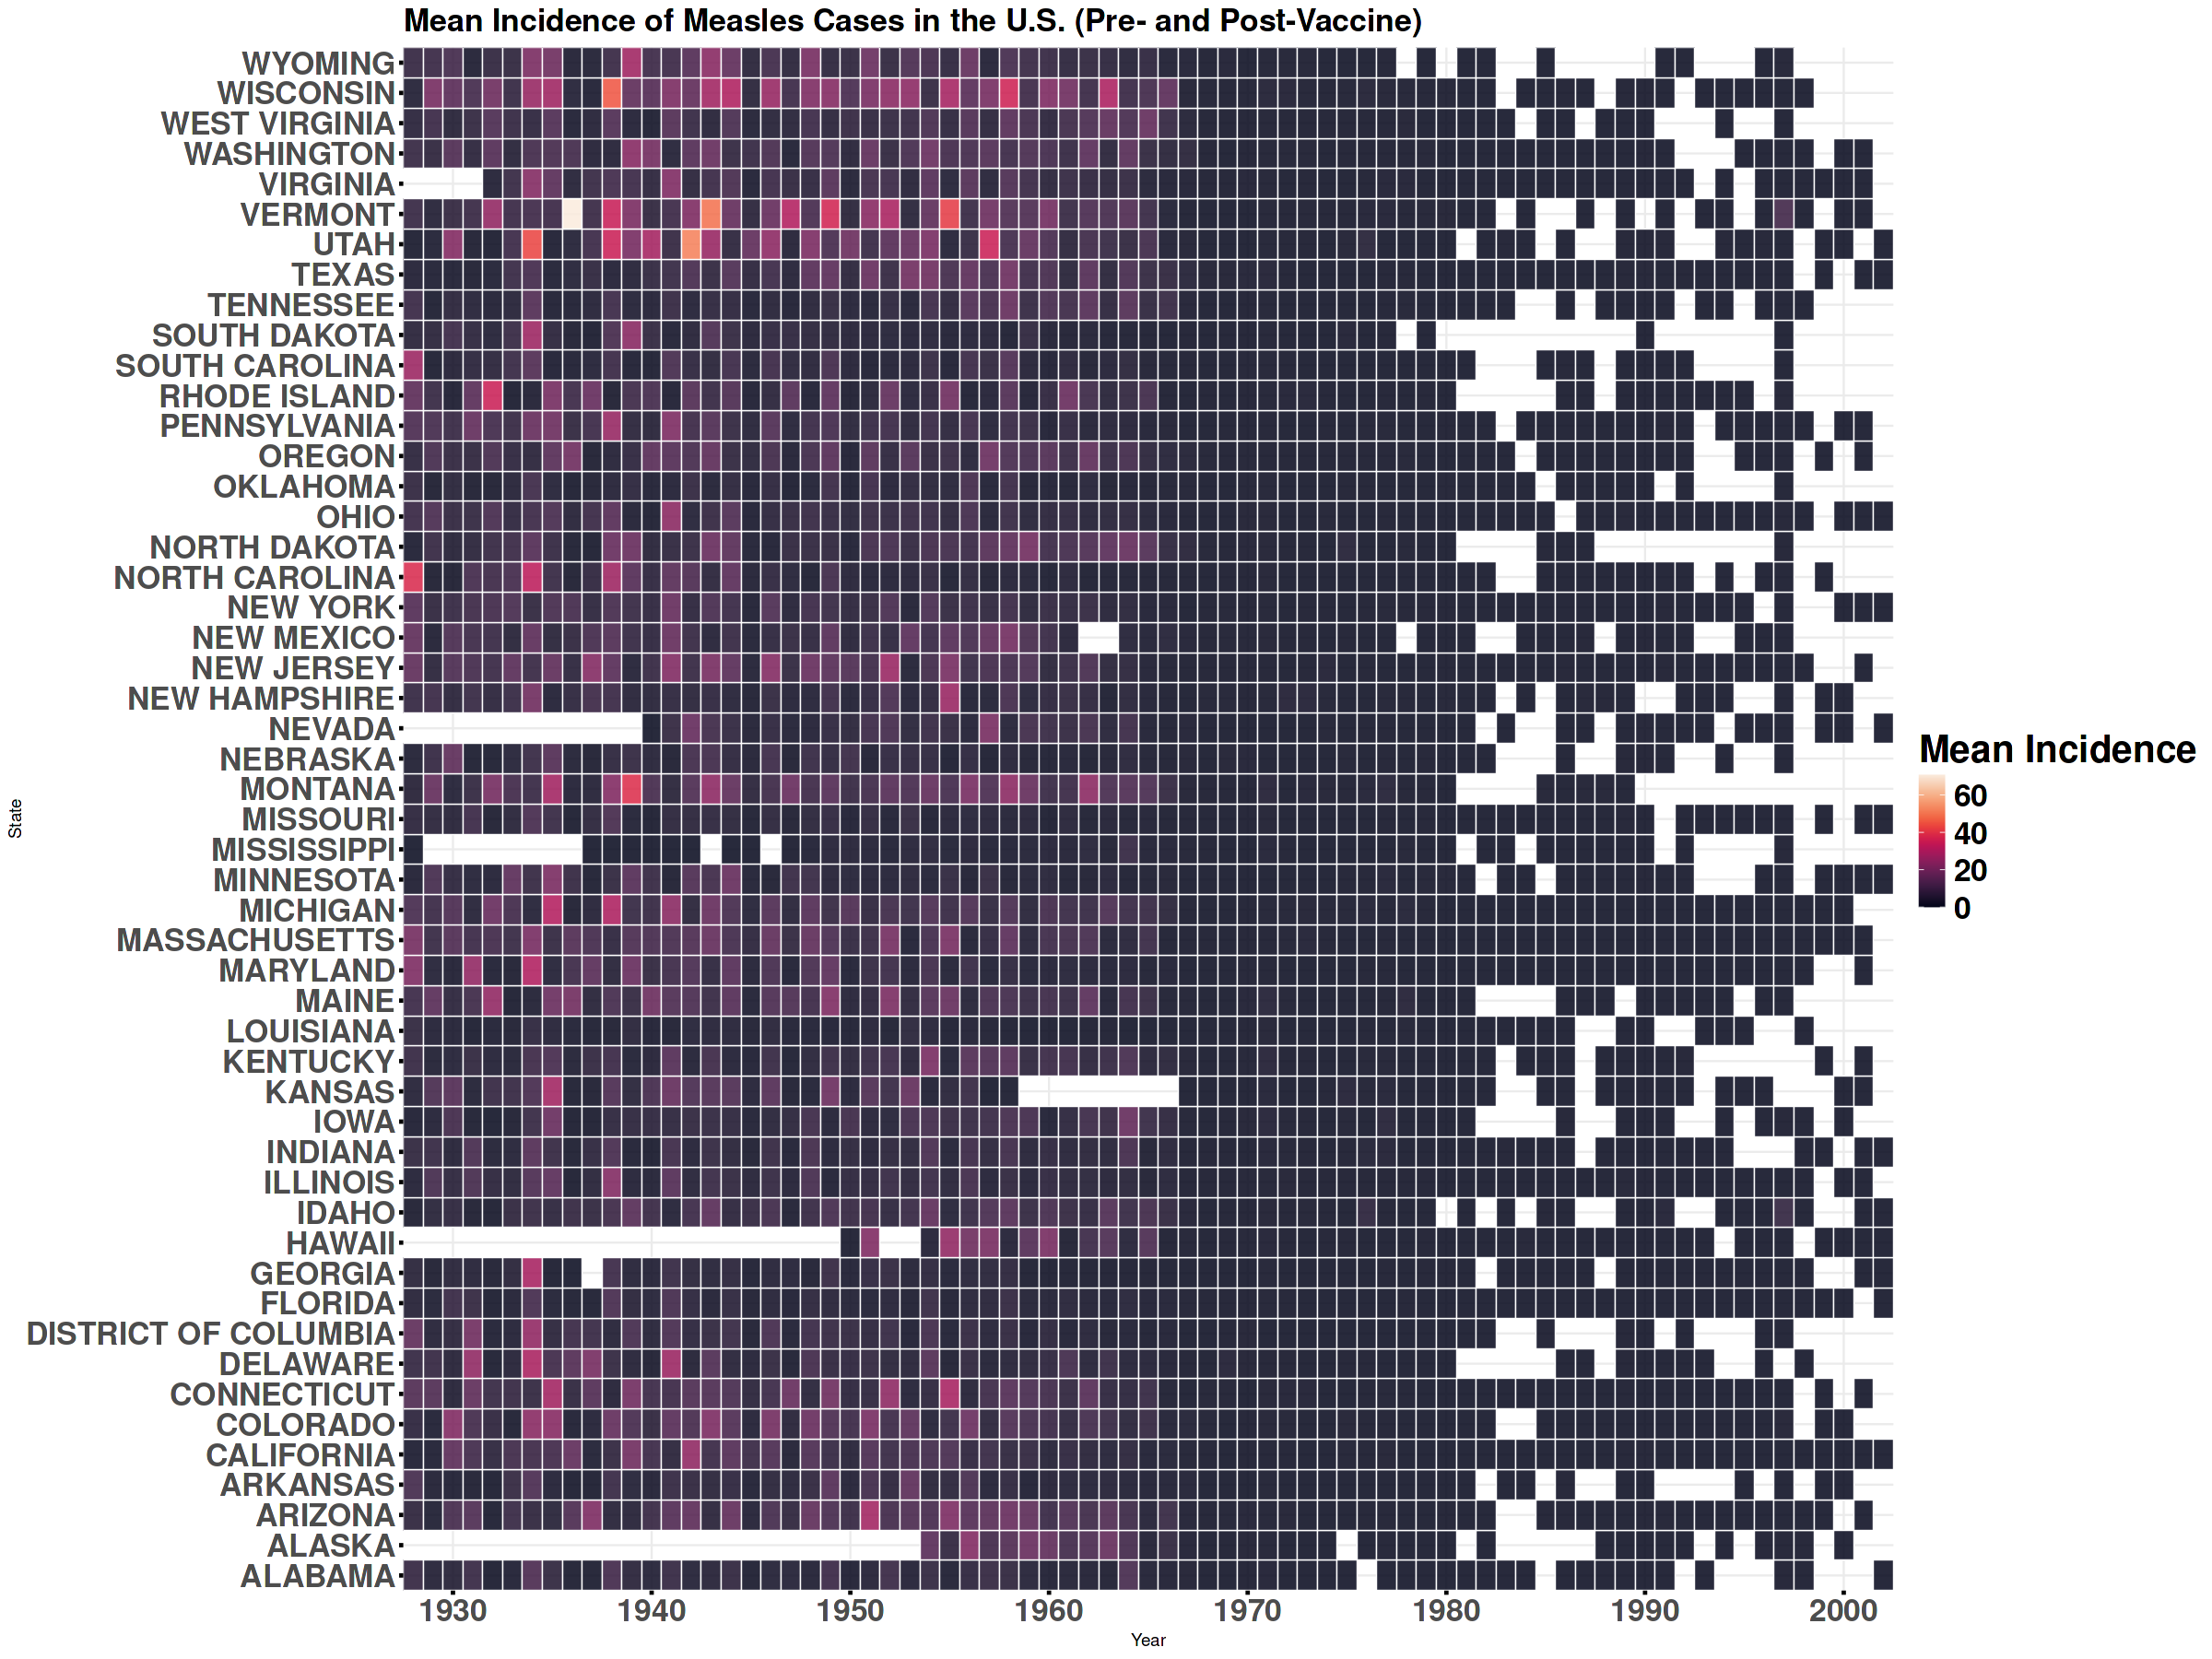

In [7]:
data <- data %>%
  mutate(year_factor = factor(year))
mean_incidence_data <- data %>% 
  group_by(loc, year_factor) %>% 
  summarize(mean_incidence = mean(incidence_per_100000, na.rm = TRUE), .groups = "drop")
tile_plot <- ggplot(mean_incidence_data, aes(x = year_factor, y = loc, fill = mean_incidence)) +
  geom_tile(alpha = 0.85, color = "white", linewidth = 0.3) +
  labs(
    x = "Year",
    y = "State",
    title = "Mean Incidence of Measles Cases in the U.S. (Pre- and Post-Vaccine)"
  ) +
  scale_y_discrete(expand = c(0, 0)) +
  scale_x_discrete(
    expand = c(0, 0),
    breaks = c("1930", "1940", "1950", "1960", "1970", "1980", "1990", "2000")
  ) +
  scale_fill_viridis(option = "F", name = "Mean Incidence") +
   theme_minimal() +
  theme(
    legend.text = element_text(size = 20, face = "bold"),
    legend.title = element_text(size = 24, face = "bold"),
    plot.title = element_text(size = 20, face = "bold"),
    axis.text.x = element_text(size = 20, face = "bold"),
    axis.text.y = element_text(size = 20, face = "bold"),
    axis.ticks = element_line(linewidth = 1)
  )
options(repr.plot.width = 20, repr.plot.height = 15)
tile_plot 

Fig. 2: Heatmap representing mean incidence rates of measles cases by state

## Explanation of the Heatmap
This heatmap visualizes the average weekly measles incidence per 100,000 people across each U.S. state over multiple years. Each row corresponds to a U.S. state, and each column represents a year from the dataset (1928–2002). The color scale (from dark to bright yellow) indicates the mean incidence rate, where:

Darker shades (~0) show low incidence.

Brighter shades (up to ~60) indicate higher incidence rates.

Key Observations:
Pre-Vaccine Era (left side of the heatmap): Most states experienced high measles incidence, particularly before 1963. Eastern states such as New York, Massachusetts, and Maryland, as well as parts of the Midwest, exhibit the highest incidence rates.

Post-Vaccine Era (right side): After the introduction of the vaccine in 1963, a significant drop in incidence rates is evident across almost all states. Most cells post-1963 are darker, reflecting much lower measles transmission.

Data Gaps: White cells represent years or states where data was missing or not reported. This may indicate underreporting or gaps in surveillance.

Regional Variation: States like New York, Massachusetts, Wisconsin, and West Virginia consistently reported higher incidences pre-vaccine, reflecting urban density and population mobility factors.

Interpretation:
This heatmap effectively illustrates how widespread measles was across the U.S. prior to the vaccination era and how impactful the vaccination campaign was in reducing cases in all regions.
It also highlights some potential patterns of delayed reporting or inconsistent surveillance in less-populated states.

# Frequency of Outbreaks: Pre- vs. Post-Vaccine

The frequency chart accounts for the Top 10 states with the highest number of outbreaks in each state prior to vaccine availability. Outbreaks are represented as the total number of case counts above the state’s average. Outbreaks occurred in all 50 states pre-vaccination, but went down significantly post-vaccination for half of the states with the largest outbreak occurrences. The relevance of the outbreaks is to help determine a state's likelihood of experiencing a resurgence of cases and thus, design guides for better resource allocation and response. Further study can help identify the main contributors to resurgences so those areas can be addressed accordingly.

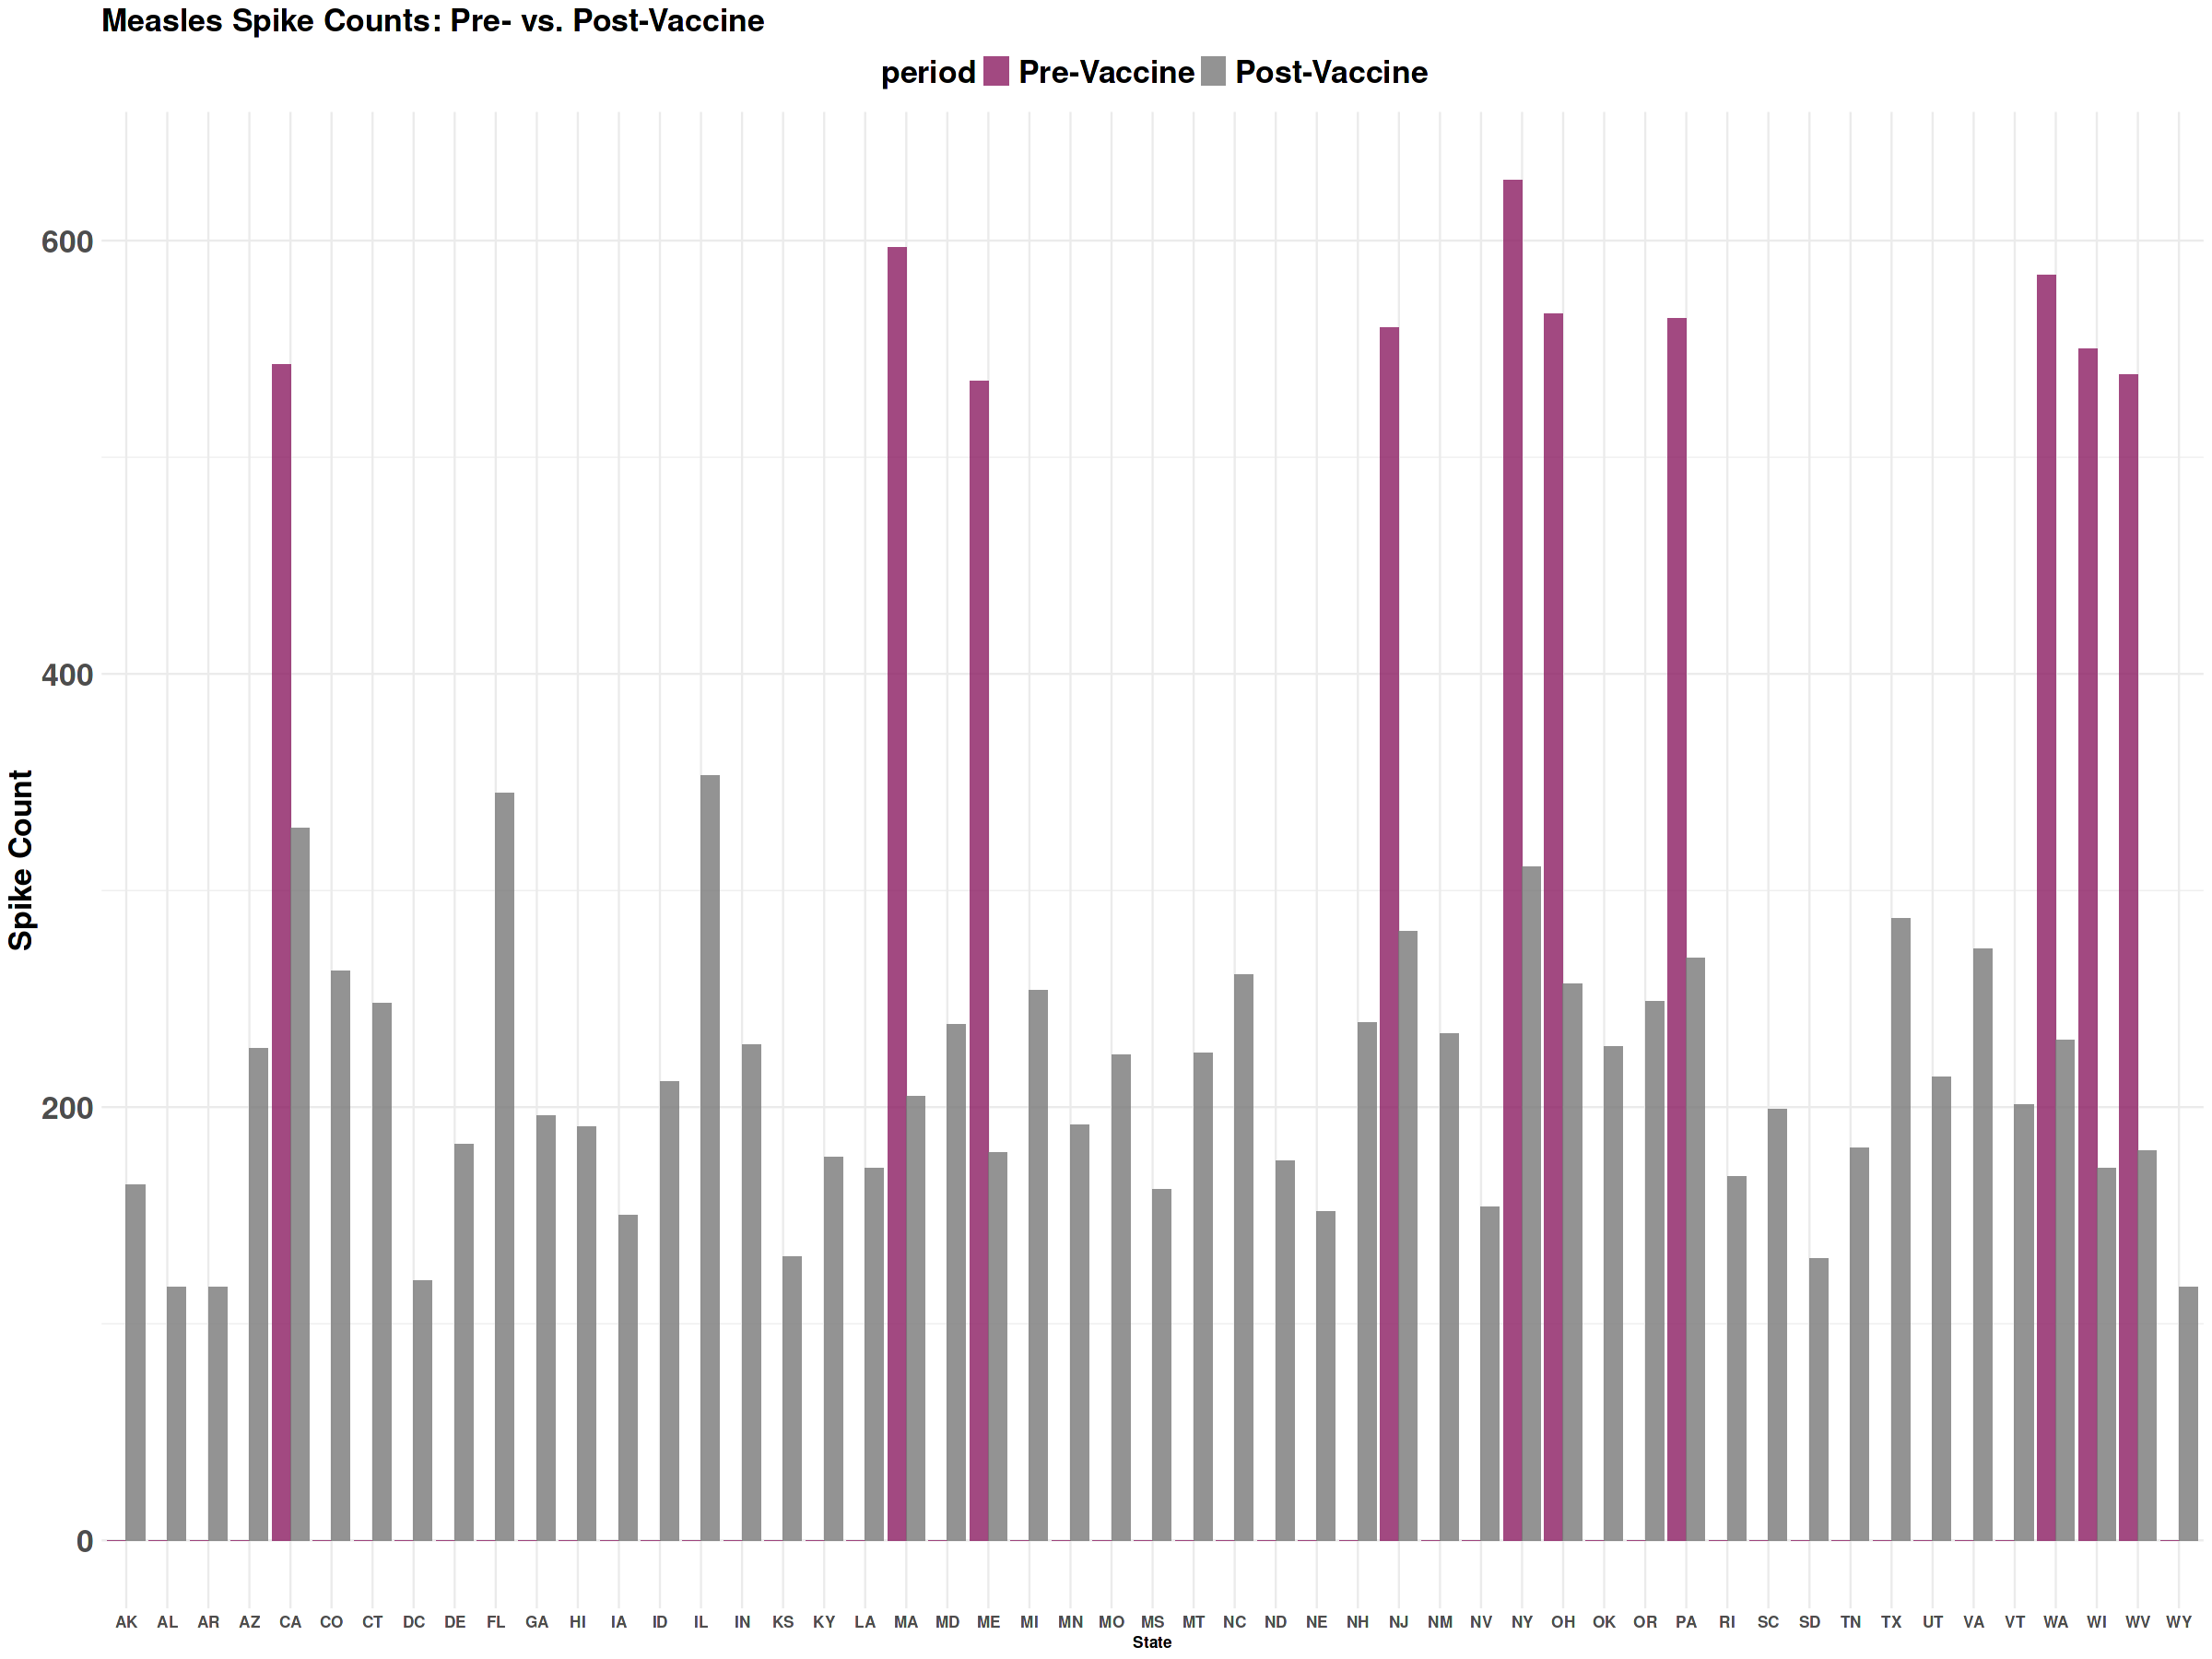

In [8]:

freq <- data %>% 
  filter(disease == "MEASLES") %>% 
  mutate(cases = as.numeric(cases),
         year = as.integer(substr(epi_week, 1, 4)),
         week = as.integer(substr(epi_week, 5, 6))) %>% 
  filter(year < 1963)

state_mean <- freq %>% 
  group_by(state) %>% 
  summarise(mean_cases = mean(cases, na.rm=TRUE), .groups = "drop") 

join_state <- freq %>% 
  left_join(state_mean, by = "state")

spikes <- join_state %>% 
  filter(cases > mean_cases)

freq_count <- spikes %>% 
  group_by(state) %>% 
  summarise(spike_count_pre = n(), .groups = "drop") %>% 
  arrange(desc(spike_count_pre))

top_states <- c("NY", "MA", "WA", "OH", "PA", "NJ", "WI", "CA", "WV", "ME")

pre_top <- freq_count %>% filter(state %in% top_states)

post_freq <- data %>% 
  filter(disease == "MEASLES") %>% 
  mutate(cases = as.numeric(cases),
         year = as.integer(substr(epi_week, 1, 4)),
         week = as.integer(substr(epi_week, 5, 6))) %>% 
  filter(year >= 1963)

post_state_mean <- post_freq %>% 
  group_by(state) %>% 
  summarise(mean_cases = mean(cases, na.rm = TRUE), .groups = "drop")

post_join <- post_freq %>% 
  left_join(post_state_mean, by = "state")

post_spikes <- post_join %>% 
  filter(cases > mean_cases)


post_freq_spikes <- post_spikes %>% 
  group_by(state) %>% 
  summarise(spike_count_post = n(), .groups = "drop")


spike_summary <- pre_top %>% 
  full_join(post_freq_spikes, by = "state") %>% 
  mutate(
    spike_count_pre = replace_na(spike_count_pre, 0),
    spike_count_post = replace_na(spike_count_post, 0),
    percent_change = if_else(spike_count_pre == 0, NA_real_,
                             (spike_count_post - spike_count_pre) / spike_count_pre * 100)
  )

waterfall_data <- spike_summary %>%
  pivot_longer(cols = c(spike_count_pre, spike_count_post),
               names_to = "period", values_to = "spike_count") %>%
  mutate(period = recode(period, 
                         spike_count_pre = "Pre-Vaccine", 
                         spike_count_post = "Post-Vaccine"))

waterfall_data$period <- factor(waterfall_data$period, levels = c("Pre-Vaccine", "Post-Vaccine"))

ggplot(waterfall_data, aes(x = state, y = spike_count, fill = period)) +
  geom_col(position = position_dodge(width = 0.9), alpha = 0.8) +
  labs(title = "Measles Spike Counts: Pre- vs. Post-Vaccine",
       y = "Spike Count",
       x = "State") +
  scale_fill_manual(values = c("Pre-Vaccine" = "maroon4", "Post-Vaccine" = "gray47")) +
  theme_minimal() +
theme(
    plot.title = element_text(size = 20, face = "bold"),    
    axis.title.x = element_text(size = 10, face = "bold"),  
    axis.title.y = element_text(size = 20, face = "bold"),  
    axis.text.x = element_text(size = 10, face = "bold"),   
    axis.text.y = element_text(size = 20, face = "bold"),   
    legend.title = element_text(size = 20, face = "bold"),  
    legend.text = element_text(size = 20, face = "bold"),
     legend.position = "top"
  )
# theme(plot.title=element_text(size= 16, face="bold"))

# Optional size tweak if using Jupyter-like environment
options(repr.plot.width = 20, repr.plot.height = 10)

Fig. 3: Frequency bar chart representing highest number of outbreaks pre- and post-vaccine introduction

## Explaination 
This bar chart compares the number of weeks with outbreak spikes in each U.S. state before (maroon) and after (gray) the introduction of the measles vaccine in 1963.

__What it shows:__
Each bar represents the total number of weeks where the measles case counts in that state exceeded the state's historical mean—indicating outbreak periods.

The states with the highest spikes pre-vaccine (NY, MA, WA, OH, PA, NJ, WI, CA, WV, ME) are highlighted because they historically saw frequent, severe outbreaks.

After 1963, there is a sharp decline in spike counts across all states, confirming the vaccine's major impact on reducing outbreak frequency and magnitude.

__How we selected these states:__
You filtered the dataset for the pre-vaccine period (<1963).

For each state, you calculated the average weekly cases and counted the number of weeks when the cases exceeded this average (spikes).

The top 10 states with the highest pre-vaccine spikes were identified and plotted alongside their post-vaccine spike counts.

__What we learn:__
States like New York (NY) and Massachusetts (MA) had hundreds of outbreak weeks before the vaccine, dropping by more than 50% after 1963.

This visualizes both the prevalence of measles in the pre-vaccine era and the effectiveness of vaccination campaigns.



## SEASONALITY OF MEASLES IN THE US
Clusters of measles cases follow a similar pattern to influenza, with cases increasing during seasons of lower temperatures and decreasing during higher seasonal temperatures. We can further segment the data to account for this seasonality, but must also consider segmenting for alignment with the school-year in the US. Other possible segments can include regions or states with hotter climates to further explore patterns of seasonality.

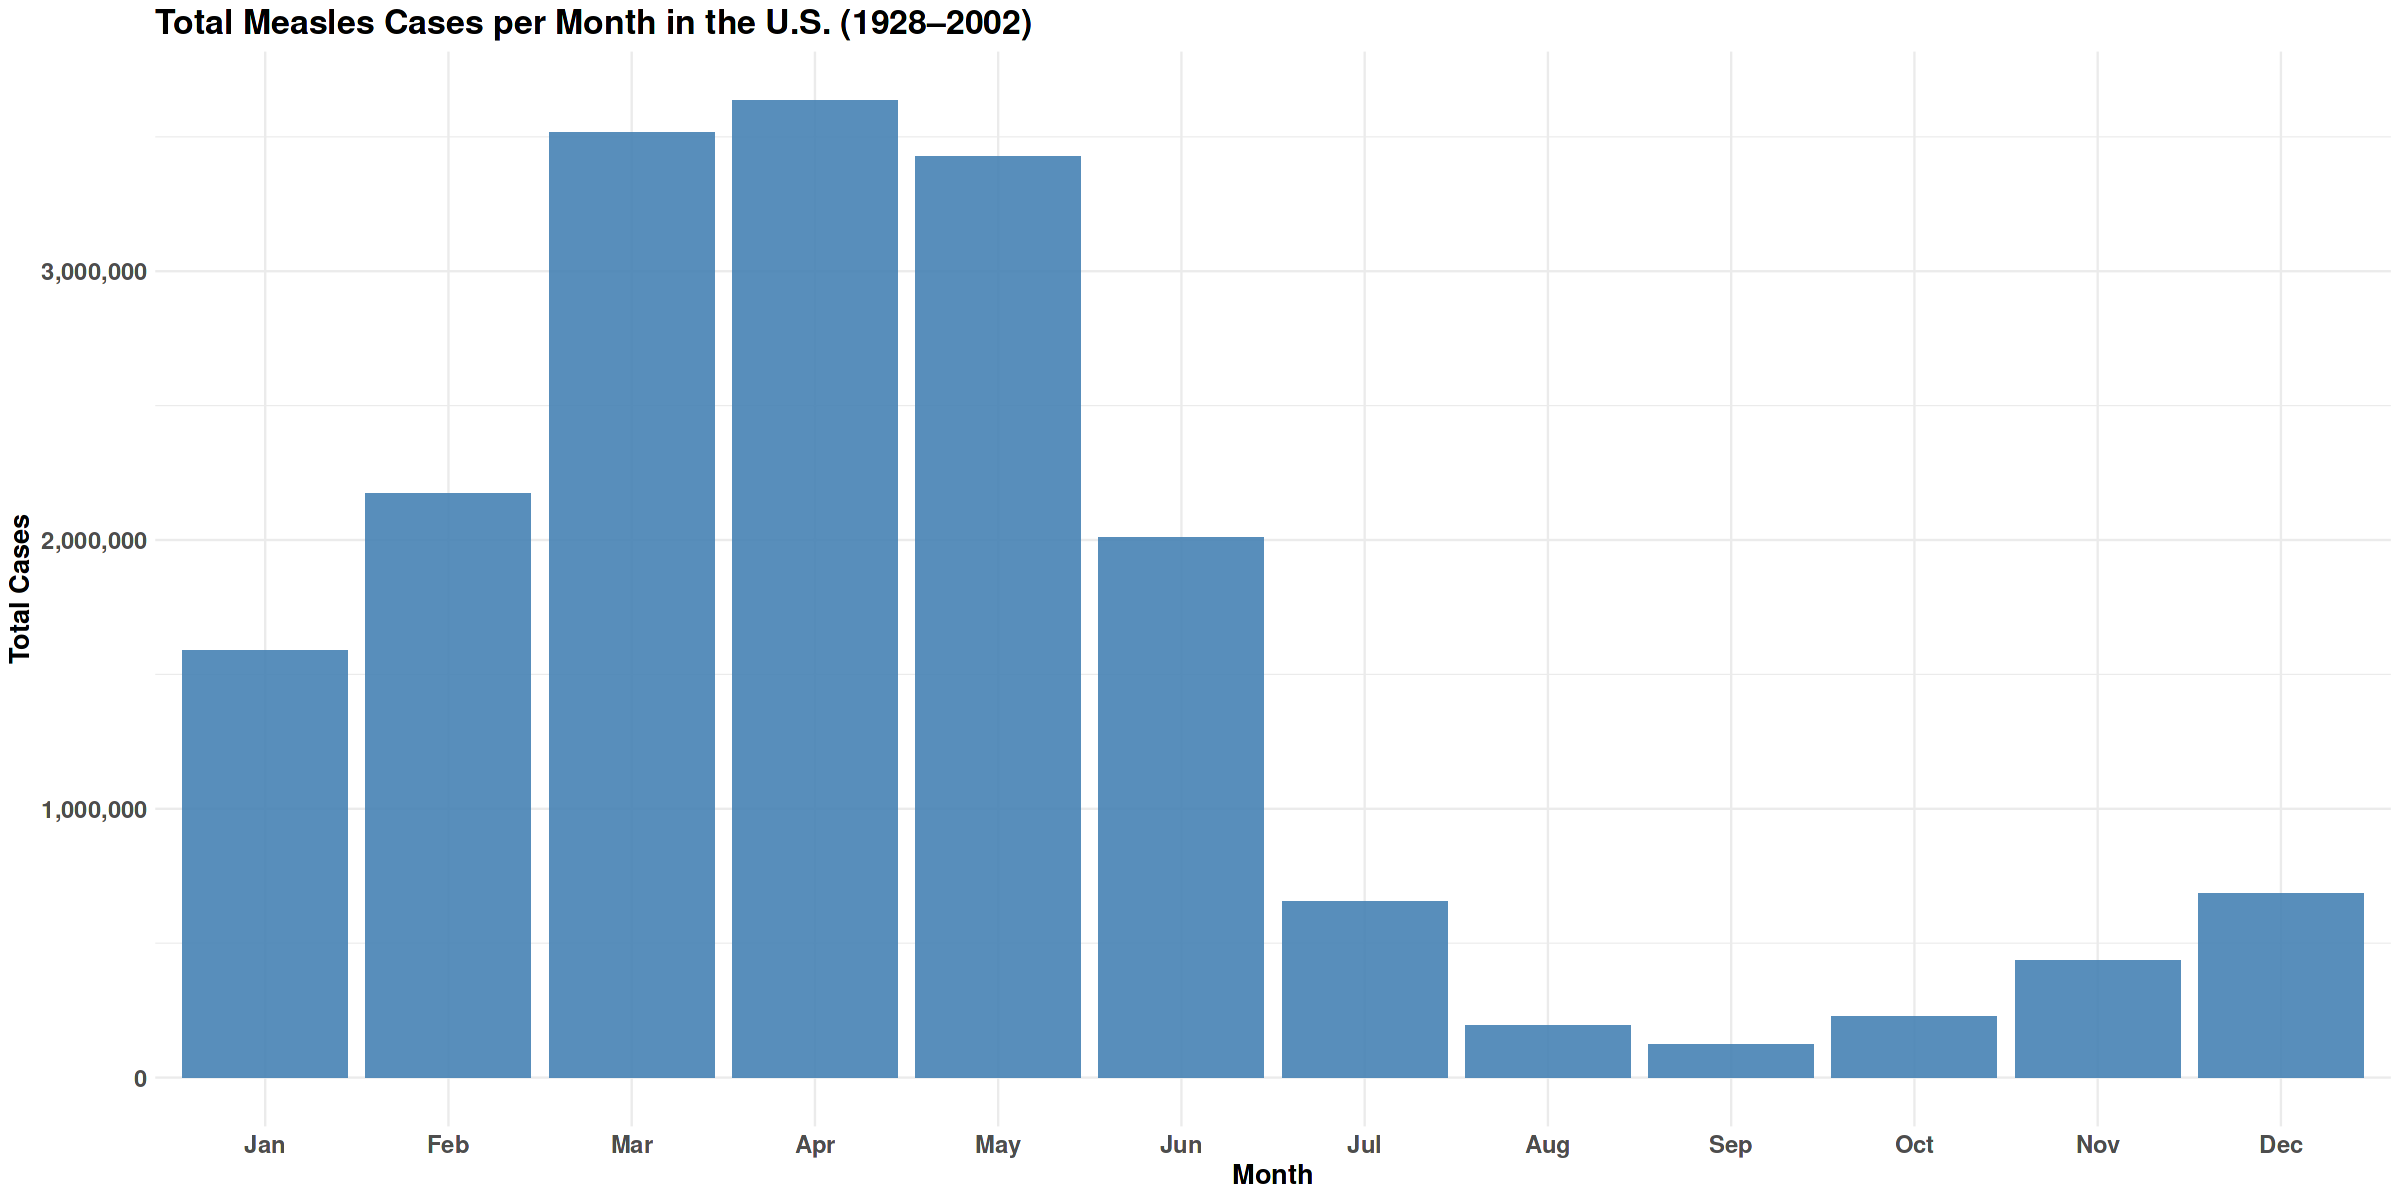

In [10]:
library(scales)
polar <- data %>% filter(disease == "MEASLES") %>%
        mutate(year = as.integer(substr(epi_week, 1,4)),
               week = as.integer(substr(epi_week, 5, 6))) %>%
mutate(date = ISOweek::ISOweek2date(paste0(year, "-W", sprintf("%02d", week), "-1"))) %>% 
mutate(month = month(date, label = TRUE, abbr = TRUE))
# Summarize total cases per month
monthly_cases <- polar %>%
  group_by(month) %>%
  summarise(total_cases = sum(cases, na.rm = TRUE), .groups = "drop")

# Bar plot with improved y-axis labels
ggplot(monthly_cases, aes(x = month, y = total_cases)) +
  geom_col(fill = "steelblue", alpha = 0.9) +
  labs(
    title = "Total Measles Cases per Month in the U.S. (1928–2002)",
    y = "Total Cases",
    x = "Month"
  ) +
  scale_y_continuous(labels = comma) +  # Fix y-axis to show commas instead of scientific notation
  theme_minimal() +
  theme(
    plot.title = element_text(size = 20, face = "bold"),
    axis.title.x = element_text(size = 16, face = "bold"),
    axis.title.y = element_text(size = 16, face = "bold"),
    axis.text.x = element_text(size = 14, face = "bold"),
    axis.text.y = element_text(size = 14, face = "bold")
  )

options(repr.plot.width = 20, repr.plot.height = 10)


Fig. 4: Bar chart representing seasonal waves

# Explanation
This bar chart displays total measles cases per month in the U.S. from 1928 to 2002. It visually represents seasonal patterns in measles outbreaks over this 74-year span.

__Peak Months (Highest Cases):__

March and April show the highest number of total cases, each exceeding 3.5 million.

February and May also have high counts, above 3 million.

__Moderate Cases:__

January and June show moderately high cases (~1.5 to 2 million).

__Low Cases (Seasonal Decline):__

July through October have the lowest totals, especially August and September, with very few cases.

Gradual Rise:

Cases begin to rise again in November and December, possibly signalling the start of a new wave.

This chart suggests a clear seasonal trend in measles outbreaks in the U.S., with spring (March–May) being the peak period and late summer/early fall (August–September) showing the lowest activity. The pattern likely reflects a combination of factors, including school calendars, climate, and transmission dynamics.

---


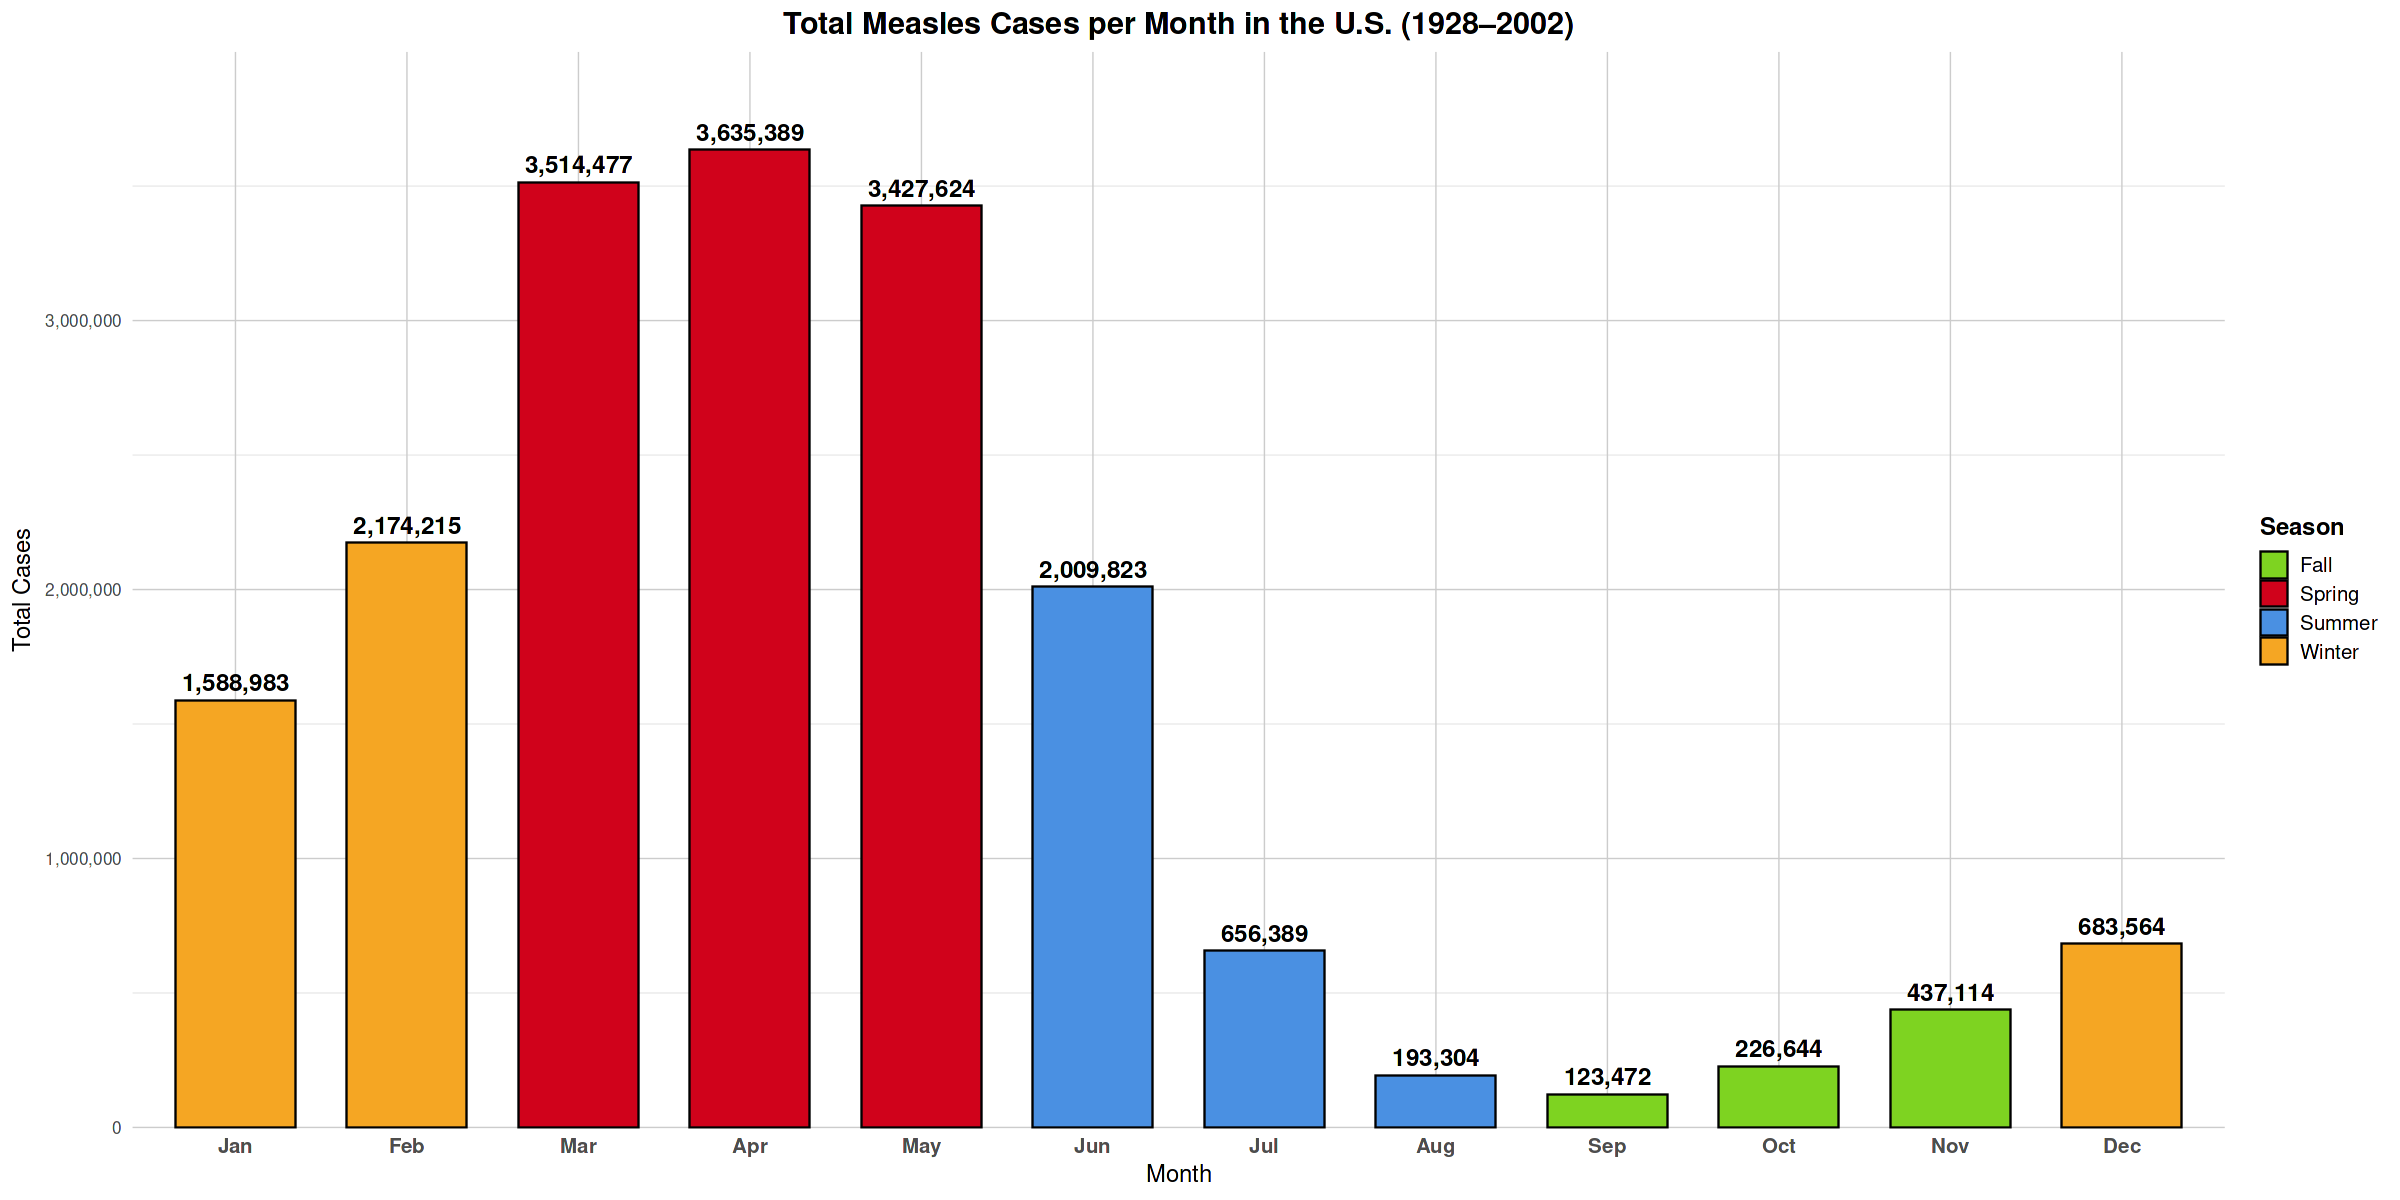

In [19]:
library(ggplot2)
library(dplyr)
library(scales)

# Assuming monthly_cases is already created as per your code...

ggplot(monthly_cases, aes(x = month, y = total_cases, fill = season)) +
  geom_col(color = "black", width = 0.7) +  # Slightly narrower bars for a typical bar chart look
  geom_text(aes(label = comma(total_cases)), 
            vjust = -0.5, size = 5, fontface = "bold") +  # Label above bars
  scale_fill_manual(values = c("Winter" = "#F5A623", "Spring" = "#D0021B", 
                               "Summer" = "#4A90E2", "Fall" = "#7ED321")) +
  scale_y_continuous(labels = comma, expand = expansion(mult = c(0, 0.1))) +  # Add space above bars
  labs(
    title = "Total Measles Cases per Month in the U.S. (1928–2002)",
    y = "Total Cases",
    x = "Month",
    fill = "Season"
  ) +
  theme_minimal(base_size = 14) +
  theme(
    plot.title = element_text(size = 18, face = "bold", hjust = 0.5),
    legend.title = element_text(size = 14, face = "bold"),
    legend.text = element_text(size = 12),
    axis.text.x = element_text(size = 12, face = "bold"),
    axis.text.y = element_text(size = 10),
    panel.grid.major = element_line(color = "gray80", linewidth = 0.3)
  )


Fig. 5: Average Monthly Measles Cases (1928–2002)

## Explanation
Figure 5 presents a bar chart that illustrates the average number of measles cases reported per month in the United States over a 74-year period, from 1928 to 2002. Each segment radiating from the center of the chart corresponds to one of the 12 months of the year, with the length of each bar representing the average number of measles cases recorded in that month.

The chart reveals a clear seasonal pattern in measles incidence:

Highest averages occur in the spring months—specifically March and April, followed closely by May and February. These months show the longest bars, indicating peak transmission.

Moderate cases are seen in January and June.

Lowest averages are observed from July through October, where the bars are shortest, signifying minimal disease activity.

November and December show a gradual rise, possibly marking the beginning of a new seasonal wave.

This pattern aligns with the natural transmission cycle of measles, which tends to peak in late winter to early spring, likely influenced by factors such as school terms, indoor crowding during colder months, and climatic conditions.

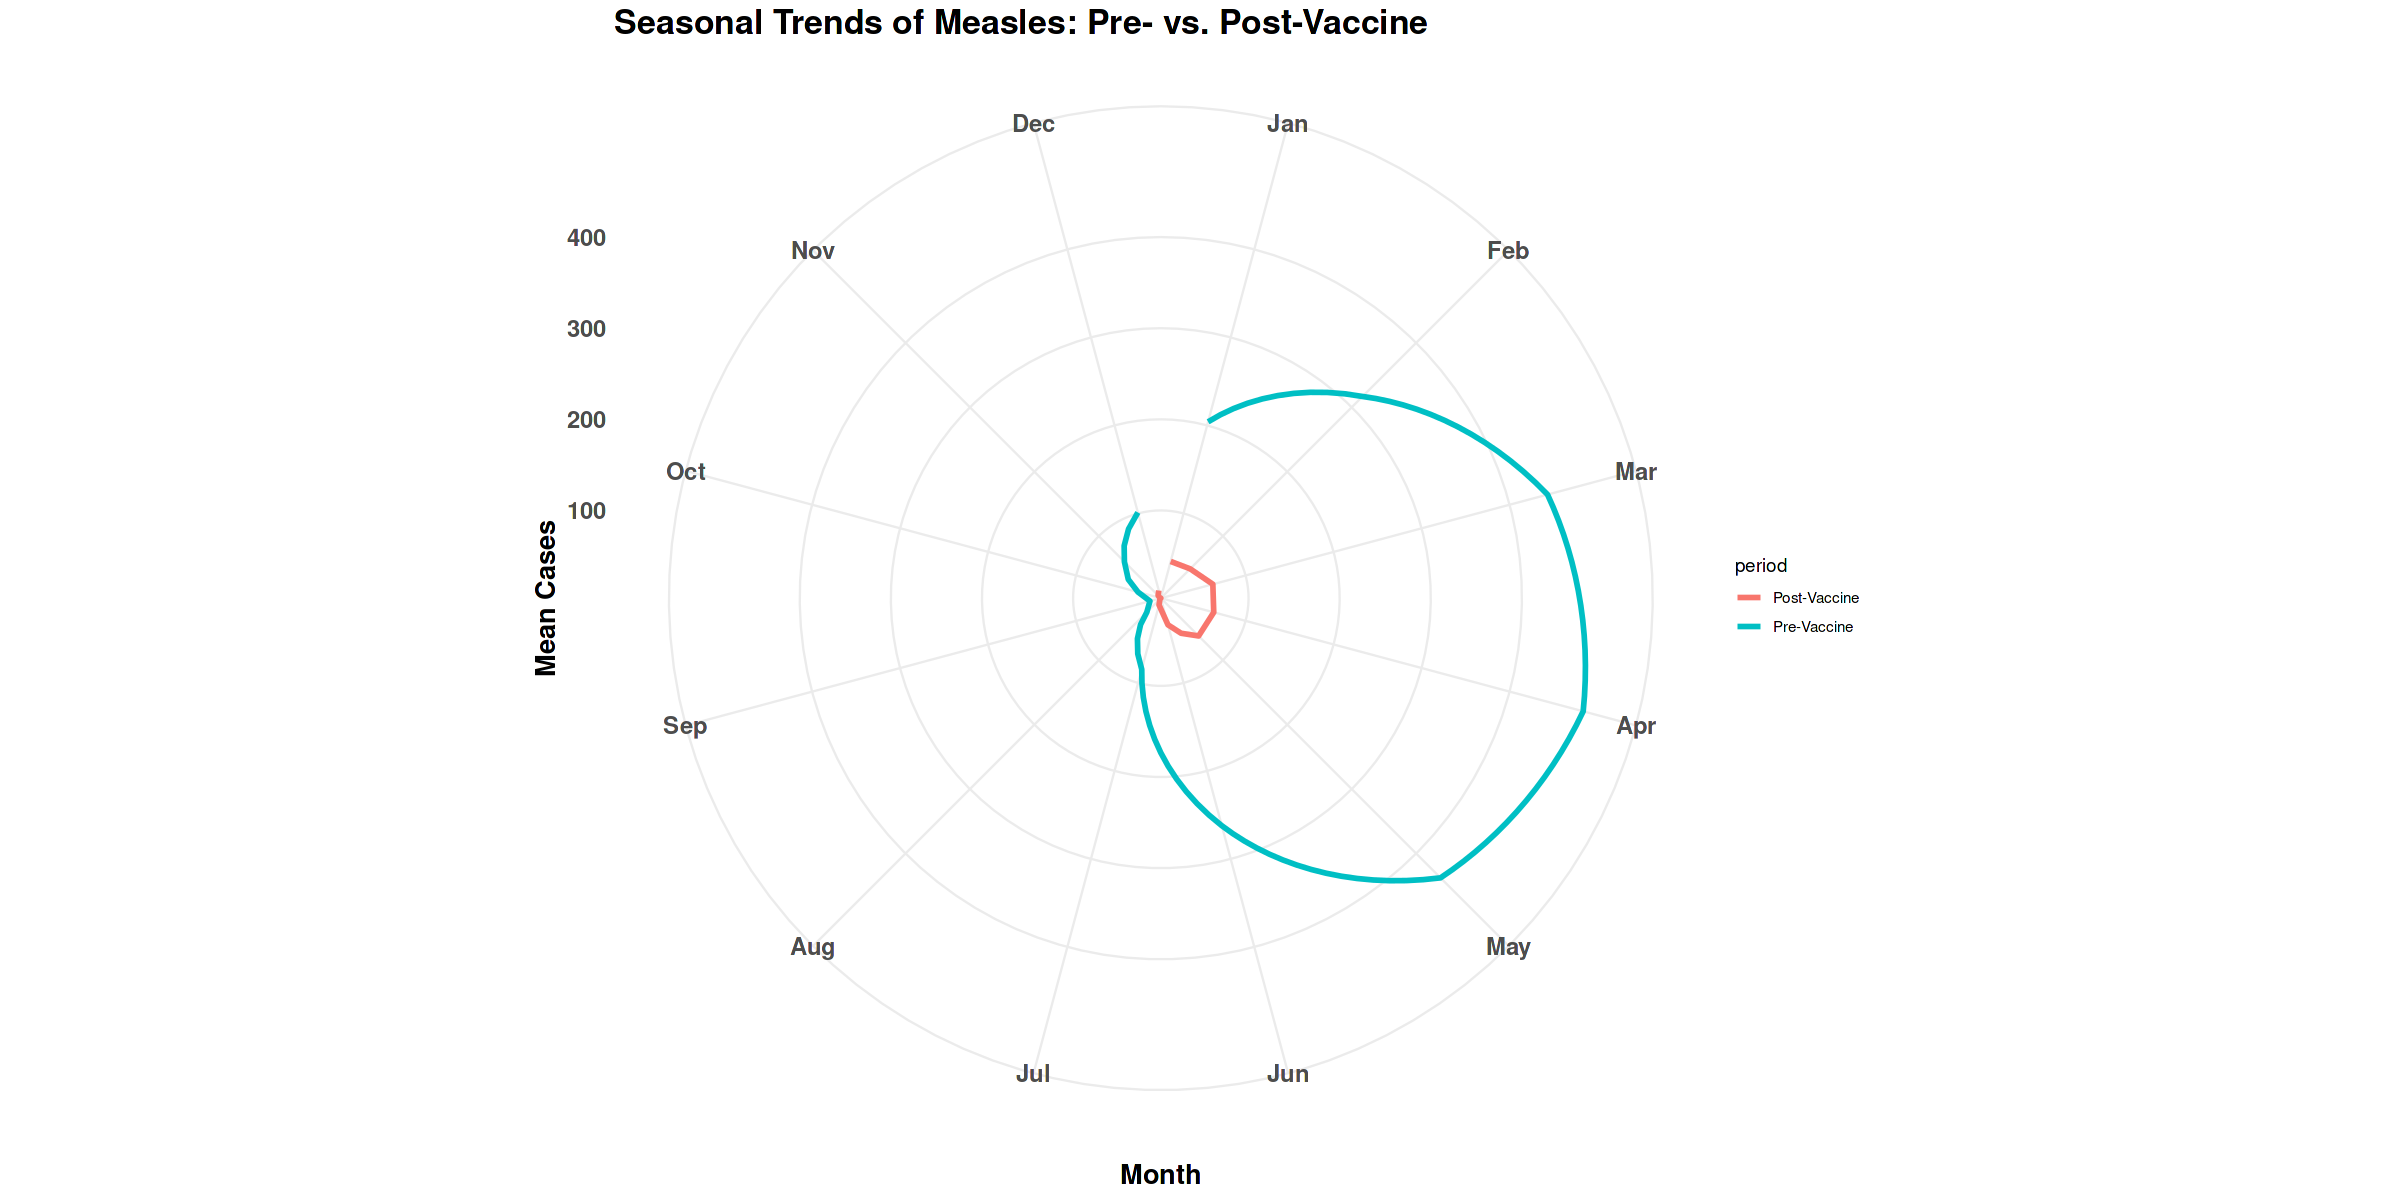

In [20]:
polar_season <- polar %>%
  mutate(period = if_else(year < 1963, "Pre-Vaccine", "Post-Vaccine")) %>%
  group_by(month, period) %>%
  summarise(mean_cases = mean(cases, na.rm = TRUE), .groups = "drop")

ggplot(polar_season, aes(x = month, y = mean_cases, color = period, group = period)) +
  geom_line(linewidth = 1.2) +
  coord_polar() +
  labs(title = "Seasonal Trends of Measles: Pre- vs. Post-Vaccine",
       y = "Mean Cases", x = "Month") +
  theme_minimal()+ theme(
    plot.title = element_text(size = 20, face = "bold"),
    axis.title.x = element_text(size = 16, face = "bold"),
    axis.title.y = element_text(size = 16, face = "bold"),
    axis.text.x = element_text(size = 14, face = "bold"),
    axis.text.y = element_text(size = 14, face = "bold")
  )


Fig. 6: Pre- vs Post-Vaccine Seasonal Patterns

## Results
__Pre-Vaccine Era:__ Eastern states such as NY, NJ, and PA had the highest case volumes. States like WI and VT had the highest incidence rates.


__Post-Vaccine Decline:__ Visual trends confirm a significant drop in measles cases post-1963.

__Outbreak Spikes:__ Frequency tables were created to count how many weeks per state experienced above-average weekly cases, highlighting outbreak-prone states.

__Seasonality:__ Different plots like bar charts and polar charts display strong annual seasonality with recurring spikes every 52 weeks.





# Discussion
__Strengths:__
* Use of comprehensive, historical public health data.


* Effective visual tools (heatmaps, ACF plots) to interpret large-scale trends.


* Clear differentiation of measles patterns before and after vaccine introduction.


__Limitations:__


* Absence of demographic and vaccination rate data limits granularity.


* No control for environmental or socioeconomic factors.


* Does not adjust for reporting inconsistencies or regional policy differences.




## Conclusions
This analysis confirms a significant reduction in measles incidences following vaccine introduction in 1963. The spatial and seasonal trends observed offer insights into disease spread dynamics and can inform modern epidemic preparedness. Future studies could include temperature, mobility, or school calendar data to refine seasonality models.

# References

* Project Tycho Database. https://www.tycho.pitt.edu (Accessed June 2025).

* Orenstein WA, Seib K (2014). Beyond vertical transmission: Measles outbreaks and vaccine hesitancy. N Engl J Med, 371(15):1290–1292.

* CDC. Measles Elimination. https://www.cdc.gov/measles/about/history.html. Accessed 8 July 2025.

* Jamal Y. (2022). Identification of Thresholds on Population Density for Understanding Transmission of COVID-19. Natl Library of Medicine. doi:10.1029/2021GH000449

* Francis R. (2019). A Guide to Elegant Tiled Heatmaps in R. https://www.royfrancis.com/a-guide-to-elegant-tiled-heatmaps-in-r-2019/. Accessed 17 June 2025.